In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
from scipy.fft import fft, fftfreq ,rfftfreq, rfft
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('S1W05DailySolarFlux.csv',parse_dates=['Date'],dayfirst=True)
df.info

<bound method DataFrame.info of             Date   f30   f15  f10.7     f8   f3.2
0     1951-11-01  70.5  87.2  107.3  111.4  291.4
1     1951-11-02  69.4  85.2  104.7  109.1  289.6
2     1951-11-03  68.7  84.2  106.1  108.5  289.6
3     1951-11-04  66.0  80.7  107.2  106.2  289.4
4     1951-11-05  71.2  88.1  114.0  111.9  289.7
...          ...   ...   ...    ...    ...    ...
25192 2020-10-21  46.3  52.9   74.0   72.0  283.0
25193 2020-10-22  45.7  52.0   75.0   71.0  281.0
25194 2020-10-23  45.5  51.6   72.0   72.0  284.0
25195 2020-10-24  44.4  49.9   72.0   72.0  282.0
25196 2020-10-25  42.2  46.7   59.9   72.0  283.0

[25197 rows x 6 columns]>

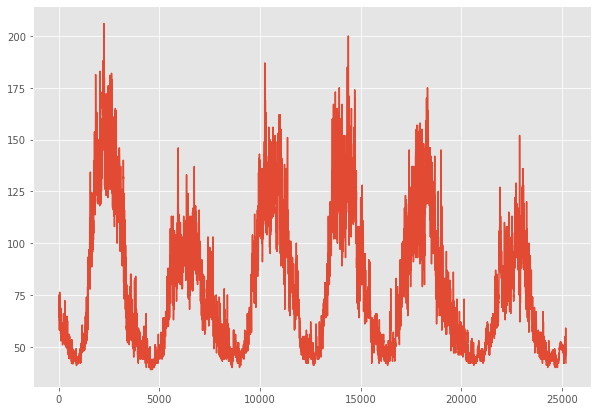

In [3]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
ax.plot(df["f30"])

In [4]:
np.shape(df["f30"])

(25197,)

In [5]:
yearly_average = df.groupby(pd.Grouper(key = "Date", freq='1Y')).mean()
yearly_average.index

DatetimeIndex(['1951-12-31', '1952-12-31', '1953-12-31', '1954-12-31',
               '1955-12-31', '1956-12-31', '1957-12-31', '1958-12-31',
               '1959-12-31', '1960-12-31', '1961-12-31', '1962-12-31',
               '1963-12-31', '1964-12-31', '1965-12-31', '1966-12-31',
               '1967-12-31', '1968-12-31', '1969-12-31', '1970-12-31',
               '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31',
               '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31',
               '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31',
               '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31',
               '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
               '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
      

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


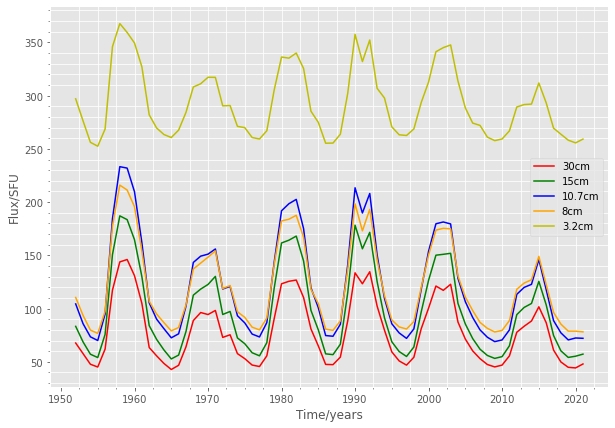

In [6]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
ax.plot(yearly_average["f30"], "r",label = "30cm")
ax.plot(yearly_average["f15"], "g",label = "15cm")
ax.plot(yearly_average["f10.7"], "b",label = "10.7cm")
ax.plot(yearly_average["f8"], "orange",label = "8cm")
ax.plot(yearly_average["f3.2"], "y",label = "3.2cm")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which = "minor")
ax.grid(which = "major", color = "k")
ax.set_xlabel("Time/years")
ax.set_ylabel("Flux/SFU")
ax.legend()
fig.savefig("year_average_flux.eps", format = "eps")

In [8]:
years = np.arange(1951,2021)
yearly_average_smooth = savgol_filter(yearly_average,6,3, axis = 0)
maxima_f10_7 = np.array(argrelextrema(yearly_average_smooth[:,2], np.greater)).T
minima_f10_7 = np.array(argrelextrema(yearly_average_smooth[:,2], np.less)).T

In [9]:
print(len(years))
print(len(yearly_average["f30"]))

70
70


In [10]:
yearly_average_smooth[minima_f10_7,0]

array([[47.00736059],
       [44.6762987 ],
       [44.60288148],
       [45.86535692],
       [46.45691135],
       [44.8657975 ],
       [44.48359868]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


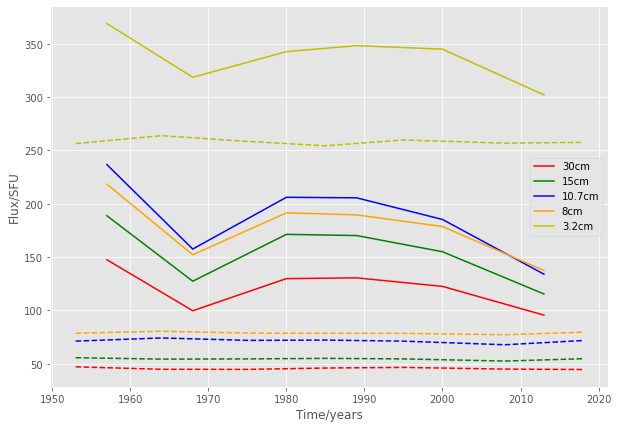

In [29]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Time/years")
ax.set_ylabel("Flux/SFU")
ax.plot(years[minima_f10_7],yearly_average_smooth[minima_f10_7,0],"r--")
ax.plot(years[minima_f10_7],yearly_average_smooth[minima_f10_7,1],"g--")
ax.plot(years[minima_f10_7],yearly_average_smooth[minima_f10_7,2],"b--")
ax.plot(years[minima_f10_7],yearly_average_smooth[minima_f10_7,3],linestyle = "--", color= "orange")
ax.plot(years[minima_f10_7],yearly_average_smooth[minima_f10_7,4],"y--")
ax.plot(years[maxima_f10_7],yearly_average_smooth[maxima_f10_7,0],"r",label = "30cm")
ax.plot(years[maxima_f10_7],yearly_average_smooth[maxima_f10_7,1],"g",label = "15cm")
ax.plot(years[maxima_f10_7],yearly_average_smooth[maxima_f10_7,2],"b",label = "10.7cm")
ax.plot(years[maxima_f10_7],yearly_average_smooth[maxima_f10_7,3],"orange",label = "8cm")
ax.plot(years[maxima_f10_7],yearly_average_smooth[maxima_f10_7,4],"y",label = "3.2cm")
ax.legend()
fig.savefig("Min_max_flux.eps", format = "eps")
#ax.plot(years[minima_f10_7], yearly_average_smooth[minima_f10_7])
#ax.plot(years[maxima_f10_7], yearly_average_smooth[maxima_f10_7])

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [14]:
mean_min = np.mean(yearly_average_smooth[minima_f10_7,:],axis =0)
mean_max = np.mean(yearly_average_smooth[maxima_f10_7,:],axis =0)
maximum_of_min = np.max(yearly_average_smooth[minima_f10_7,:],axis =0)
minimum_of_min = np.min(yearly_average_smooth[minima_f10_7,:],axis =0)
maximum_of_max = np.max(yearly_average_smooth[maxima_f10_7,:],axis =0)
minimum_of_max = np.min(yearly_average_smooth[maxima_f10_7,:],axis =0)
print("mean min")
print(mean_min)
print("max of min")
print(maximum_of_min)
print("min of min")
print(minimum_of_min)
print("dMin")
print(maximum_of_min-minimum_of_min)
print("mean max")
print(mean_max)
print("max of max")
print(maximum_of_max)
print("min of max")
print(minimum_of_max)
print("dMax")
print(maximum_of_max-minimum_of_max)

mean min
[[ 45.42260075  54.36849537  71.35163452  78.70350739 258.13948396]]
max of min
[[ 47.00736059  55.56094696  74.06677619  80.36685381 263.77166012]]
min of min
[[ 44.48359868  52.40343729  67.69230968  77.0941051  254.31795138]]
dMin
[[2.52376192 3.15750967 6.37446651 3.27274871 9.45370874]]
mean max
[[120.84817106 154.60217619 187.44755106 177.87213013 337.55008282]]
max of max
[[147.40055878 188.69965929 236.62695643 218.32531919 368.91984007]]
min of max
[[ 95.49166009 115.32696609 133.88437091 137.37859912 302.04748821]]
dMax
[[ 51.90889868  73.3726932  102.74258552  80.94672007  66.87235186]]


In [15]:
#determine solar cycle from max and min
max_years_distance = years[maxima_f10_7][1:]-years[maxima_f10_7][:-1]
print("cycle form max years")
print(np.mean(max_years_distance))
min_years_distance = years[minima_f10_7][1:]-years[minima_f10_7][:-1]
print((np.max(max_years_distance)-np.min(max_years_distance))/2)
print("cycle from min years")
print(np.mean(min_years_distance))
print((np.max(min_years_distance)-np.min(min_years_distance))/2)

cycle form max years
11.2
2.0
cycle from min years
10.833333333333334
1.5


In [16]:
xf = rfftfreq(len(yearly_average["f30"]),1)
y_norm = np.array(yearly_average["f30"]) - np.mean(np.array(yearly_average["f30"]))
yf = np.abs(rfft(y_norm))

In [17]:
f = xf[np.argmax(yf)]
df = (0.10562 - 0.07289)/2
print("cycle from Fourier Transform")
print(df)
print(f)
print(1/f)
print(1/f**2*df)

cycle from Fourier Transform
0.016365000000000005
0.08571428571428572
11.666666666666666
2.227458333333334


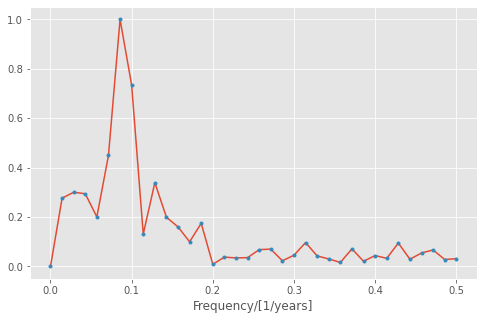

In [18]:
%matplotlib inline
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xf, yf/np.max(yf))
ax.plot(xf, yf/np.max(yf),".")
ax.set_xlabel("Frequency/[1/years]")
fig.savefig("fourier_yearly.eps",format = "eps")

In [32]:
df = pd.read_csv("SN_y_tot_V2.0.csv",delimiter=";")
df.info

<bound method DataFrame.info of        year  spots   std    NoO  D_P_M
0    1700.5    8.3  -1.0     -1      1
1    1701.5   18.3  -1.0     -1      1
2    1702.5   26.7  -1.0     -1      1
3    1703.5   38.3  -1.0     -1      1
4    1704.5   60.0  -1.0     -1      1
..      ...    ...   ...    ...    ...
318  2018.5    7.0   1.1  12611      1
319  2019.5    3.6   0.5  12884      1
320  2020.5    8.8   4.1  14440      1
321  2021.5   29.6   7.9  15233      1
322  2022.5   83.1  13.9  14273      0

[323 rows x 5 columns]>

In [33]:
df["spots"]

0       8.3
1      18.3
2      26.7
3      38.3
4      60.0
       ... 
318     7.0
319     3.6
320     8.8
321    29.6
322    83.1
Name: spots, Length: 323, dtype: float64

In [35]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(df["year"],df["spots"])
ax.set_xlabel("Time/years")
ax.set_ylabel("Sunspot number")
fig.savefig("yearly_sunspots.eps",format = "eps")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/maxrichter/miniconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'mean', 'rfft', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
libGL error: MESA-LOADER: failed to open iris: /home/maxrichter/miniconda3/lib/python3.8/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /usr/lib64/dri/iris_dri.so) (search paths /usr/lib64/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /home/maxrichter/miniconda3/lib/python3.8/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /usr/lib64/dri/swrast_dri.so) (search paths /usr/lib64/dri, suffix _dri)
libGL error: failed to load driver: swrast


In [22]:
N = len(df["year"])
xf = rfftfreq(N,1)
mean = np.mean(np.array(df["spots"]))
y_norm = np.array(df["spots"]) - mean
yf = 1/N* np.abs(rfft(y_norm))


In [23]:
f_max = xf[np.argmax(yf)]
sort_yf = np.sort(yf)
f_2max = xf[np.where(yf ==sort_yf[-2])]
f_average = (f_max + f_2max)/2
T_average = (1/f_max + 1/f_2max)/2
print(f_max)
print(f_2max)
print(1/f_max)
print(1/f_2max)
print(1/f_average)
print(T_average)

0.08978328173374614
[0.09907121]
11.137931034482758
[10.09375]
[10.59016393]
[10.61584052]


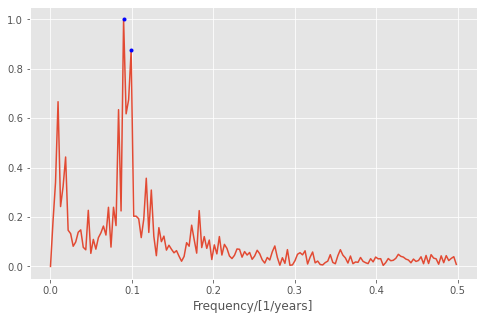

In [24]:
yf_norm = yf/np.max(yf)
fig = plt.figure(figsize =(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xf, yf_norm)
ax.plot(xf[np.argmax(yf)],yf_norm[np.argmax(yf)],"b.")
ax.plot(xf[np.where(yf ==sort_yf[-2])],yf_norm[np.where(yf ==sort_yf[-2])],"b.")
ax.set_xlabel("Frequency/[1/years]")
fig.savefig("Fourier_sunspots.eps",format = "eps")

In [25]:
df_spots = (f_2max-f_max)
dT = df_spots/f_average**2

In [26]:
dT

array([1.04165547])

In [27]:
#calculating weighted average
T = np.array([11.2,10.8,11.7,10.6])
dT = np.array([2,1.5,2.2,1.0])
sigma = 1/dT**2
T_wav = np.sum(T*sigma)/np.sum(sigma)
dT_wav = 1/np.sqrt(np.sum(sigma))
print(T_wav)
print(dT_wav)

10.845211930926215
0.7252747252747254
